# Set Up and Dataset

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from scipy.stats import f_oneway
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [2]:
diabetes = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Features Description

**Target Feature**

0. Diabetes_012: No=0, Pre-diabetes or borderline diabetes=1, Diabetes=2


**Self Response Predictor Features**

1. HighBP: Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional --> Yes=1, No=0

2. HighChol: Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? --> Yes=1, No=0

3. CholCheck: Cholesterol check within past five years --> Yes=1, No=0

4. BMI: Body Mass Index (BMI) --> BMI value

5. Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] --> Yes=1, No=0

6. Stroke: (Ever told) you had a stroke. --> Yes=1, No=0  

7. HeartDiseaseorAttack: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) --> Yes=1, No=0

8. PhyActiviity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job --> Yes=1, No=0

9. Fruits: Consume Fruit 1 or more times per day --> Yes=1, No=0

10. Veggies: Consume Vegetables 1 or more times per day --> Yes=1, No=0

11. HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) --> Yes=1, No=0

12. AnyHealthcare: Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? --> Yes=1, No=0

13. NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? --> Yes=1, No=0

14. GenHlth: Would you say that in general your health is: --> Ordinal feature: 1=Excellent - 5=Poor

15. MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? --> Ordinal=number of days  

16. PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? --> Ordinal=number of days  

17. DiffWalk: Do you have serious difficulty walking or climbing stairs? --> Yes=1, No=0
  
18. Sex: Indicate sex of respondent. --> Female=0, Male=1

19. Age: Age category --> Ordinal: age 18-24=1, all the way up to 13, which is 80 and older. 5 year increments.

20. Education: What is the highest grade or year of school you completed? --> Ordinal: 1 being never attended school or kindergarten only up to 6 being college 4 years or more

21. Income: Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") --> Ordinal: 1 being less than $ $10,000 all the way up to 8 being $ $75,000 or more

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Train-Test Split

In [4]:
X = diabetes.iloc[:, 1:22]
y = diabetes.iloc[:, 0]

In [5]:
#train test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

In [6]:
# make combined data frame for EDA
df = pd.concat([xtrain, ytrain], axis=1)
df["Diabetes_binary"] = df["Diabetes_012"].apply(lambda x: 0 if x == 0 else 1)

# EDA

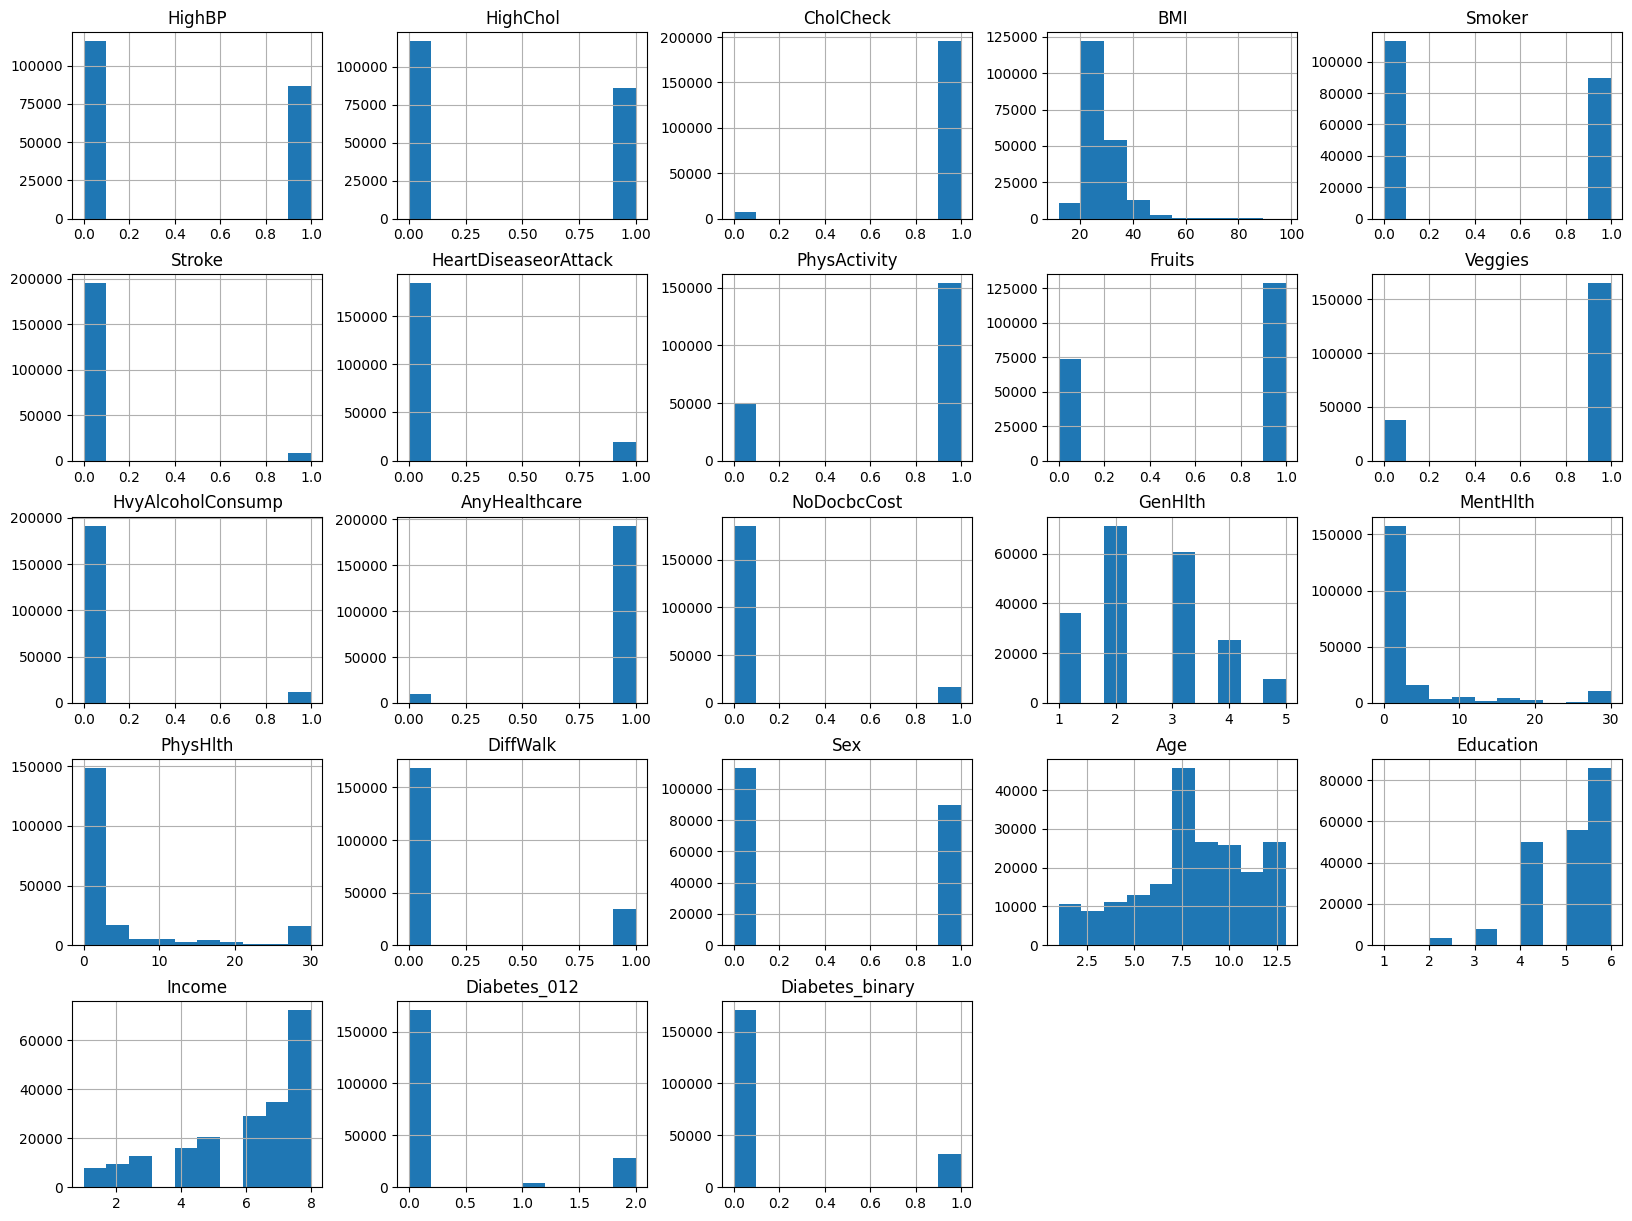

In [7]:
df.hist(figsize=(20,15));

In [8]:
df_no = df[df['Diabetes_binary'] == 0]
df_yes = df[df['Diabetes_binary'] == 1]

## Correlation Plots

### Overall Correlation

In [9]:
cm = sns.light_palette("seagreen", as_cmap=True)
corr_matrix_style = df.corr().style.background_gradient(cmap = cm)
corr_matrix_style

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012,Diabetes_binary
HighBP,1.000000,0.297478,0.098030,0.214194,0.097624,0.129690,0.209806,-0.125568,-0.038870,-0.061417,-0.004543,0.039682,0.017898,0.299930,0.056837,0.160288,0.223178,0.052827,0.344074,-0.141898,-0.171990,0.270658,0.269400
HighChol,0.297478,1.000000,0.083665,0.105823,0.091691,0.091229,0.179990,-0.077380,-0.039430,-0.038919,-0.011224,0.042269,0.014209,0.207829,0.062459,0.121245,0.142843,0.032824,0.271406,-0.070393,-0.084441,0.205959,0.207133
CholCheck,0.098030,0.083665,1.000000,0.034951,-0.010578,0.023970,0.043143,0.003187,0.023508,0.005388,-0.025118,0.118243,-0.056731,0.046387,-0.008310,0.031622,0.040849,-0.021718,0.090082,0.002312,0.012552,0.067592,0.067965
BMI,0.214194,0.105823,0.034951,1.000000,0.014660,0.021156,0.053729,-0.147849,-0.087857,-0.061982,-0.048367,-0.016750,0.058715,0.238185,0.084380,0.120842,0.197325,0.044718,-0.035868,-0.103956,-0.098316,0.225095,0.224732
Smoker,0.097624,0.091691,-0.010578,0.014660,1.000000,0.061839,0.114668,-0.086469,-0.079190,-0.029439,0.102742,-0.024010,0.049706,0.163077,0.091921,0.115958,0.122270,0.094211,0.121780,-0.162090,-0.124508,0.064224,0.064001
Stroke,0.129690,0.091229,0.023970,0.021156,0.061839,1.000000,0.203434,-0.069505,-0.012359,-0.041136,-0.017204,0.008598,0.035575,0.179872,0.071201,0.150489,0.177488,0.003324,0.125188,-0.077748,-0.130898,0.108588,0.106100
HeartDiseaseorAttack,0.209806,0.179990,0.043143,0.053729,0.114668,0.203434,1.000000,-0.086135,-0.019577,-0.039048,-0.029913,0.017633,0.031687,0.258901,0.065559,0.181748,0.212558,0.086015,0.220205,-0.099756,-0.142173,0.181905,0.178507
PhysActivity,-0.125568,-0.077380,0.003187,-0.147849,-0.086469,-0.069505,-0.086135,1.000000,0.142186,0.151121,0.013549,0.035545,-0.061833,-0.265323,-0.125091,-0.217957,-0.253392,0.032810,-0.092451,0.198737,0.198590,-0.121885,-0.121259
Fruits,-0.038870,-0.039430,0.023508,-0.087857,-0.079190,-0.012359,-0.019577,0.142186,1.000000,0.254964,-0.036208,0.031023,-0.043893,-0.103200,-0.067136,-0.044146,-0.048782,-0.092034,0.065073,0.108648,0.078904,-0.041018,-0.040966
Veggies,-0.061417,-0.038919,0.005388,-0.061982,-0.029439,-0.041136,-0.039048,0.151121,0.254964,1.000000,0.021736,0.028804,-0.032429,-0.123803,-0.056199,-0.063088,-0.080615,-0.065517,-0.008588,0.153326,0.149123,-0.059514,-0.060009


### Age

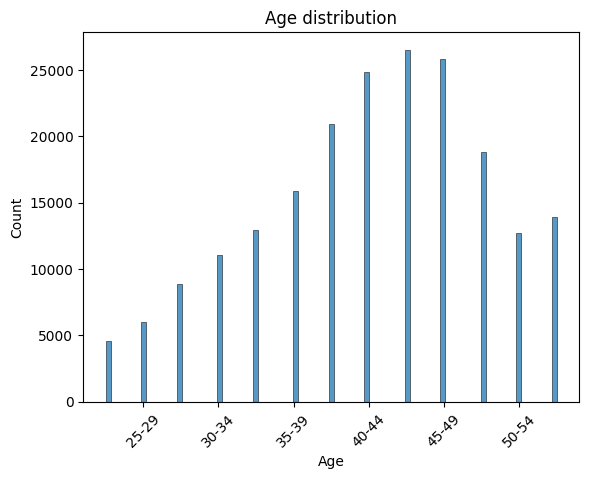

In [10]:
ax = sns.histplot(data=df, x='Age')
ax.set(title= 'Age distribution')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45);

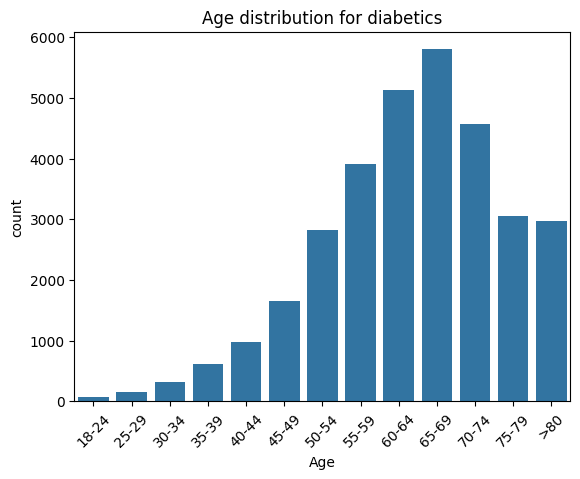

In [11]:
ax = sns.countplot(data=df_yes, x='Age')
ax.set(title= 'Age distribution for diabetics')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45);

### Income and Education

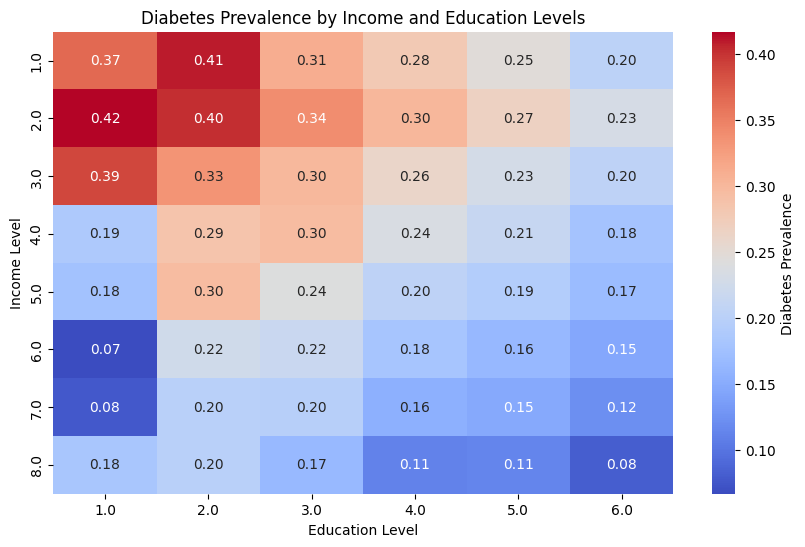

In [12]:
diabetes_income_education = df.groupby(['Income', 'Education'])['Diabetes_binary'].mean().reset_index()

heatmap_data = diabetes_income_education.pivot(index="Income", columns="Education", values="Diabetes_binary")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Diabetes Prevalence'})
plt.title("Diabetes Prevalence by Income and Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Income Level")
plt.show()

### BMI

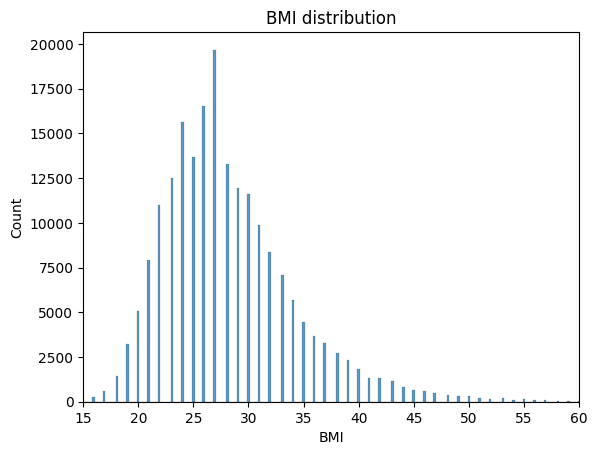

In [13]:
ax = sns.histplot(data=df, x='BMI').set(title='BMI distribution')
plt.xlim(15, 60);

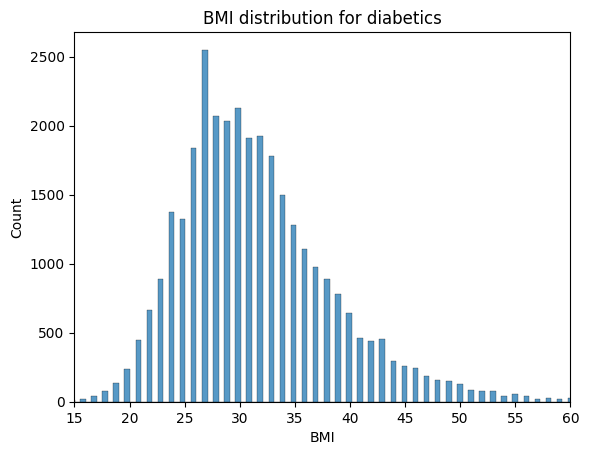

In [14]:
ax1 = sns.histplot(data=df_yes, x='BMI').set(title='BMI distribution for diabetics')
plt.xlim(15, 60);

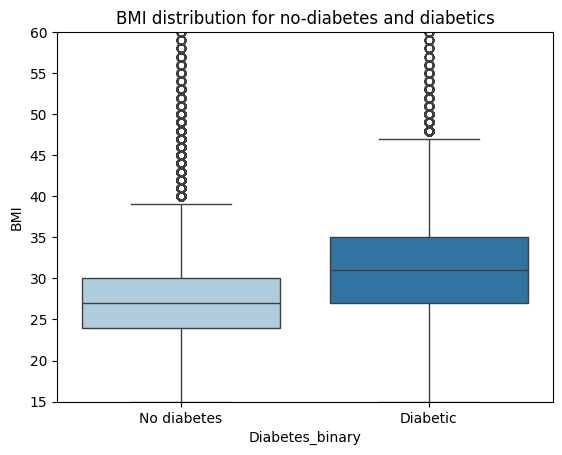

In [15]:
ax2 = sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='Paired')
ax2.set(title = 'BMI distribution for no-diabetes and diabetics')
ax2.set_xticklabels(['No diabetes', 'Diabetic'])
plt.ylim(15, 60);

### High Cholesterol, High Blood Pressure, Smoking, Alcohol Consumption, Physical Activity

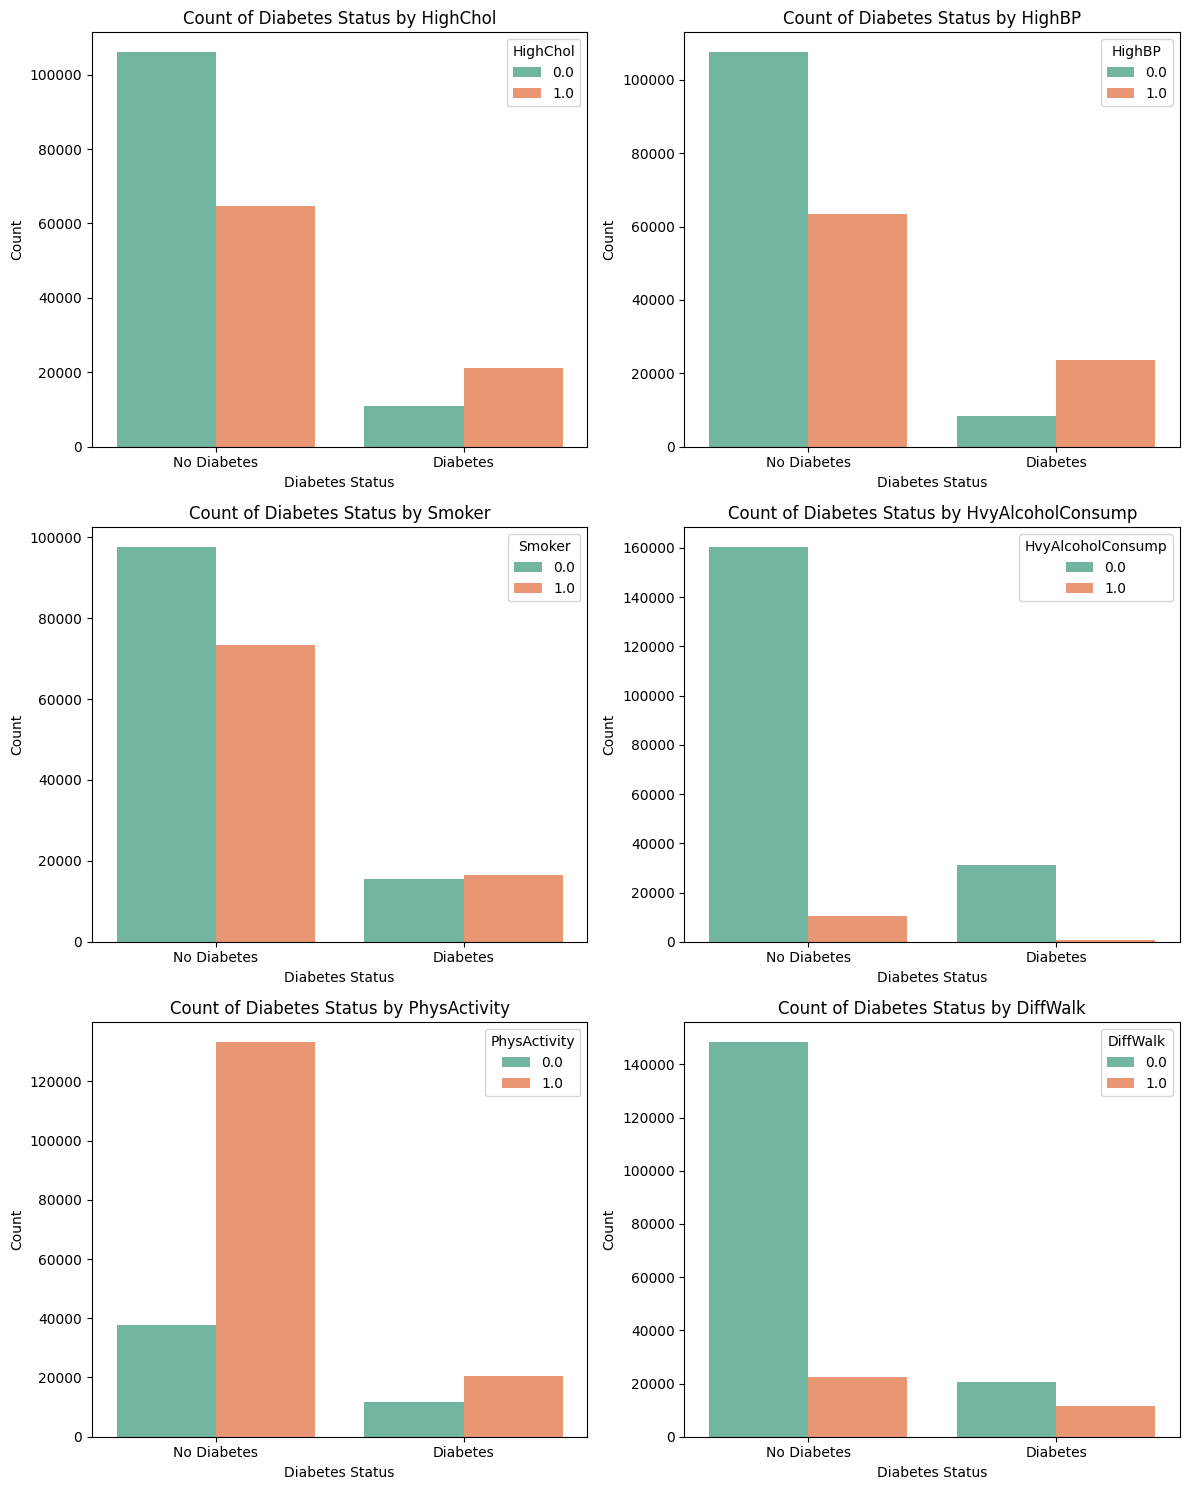

In [16]:
col_names = ['HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk']
a = 3
b = 2
c = 1

fig = plt.figure(figsize=(12, 15))
for col in col_names:
    plt.subplot(a, b, c)
    ax = sns.countplot(data=df, x='Diabetes_binary', hue=col, palette='Set2')
    ax.set(title=f'Count of Diabetes Status by {col}', xlabel='Diabetes Status', ylabel='Count')
    ax.set_xticklabels(['No Diabetes', 'Diabetes'])
    ax.legend(title=col)
    c += 1
plt.tight_layout()
plt.show();

# Dimension Analysis

### PCA

In [17]:
pca = PCA(n_components=len(xtrain.columns))
pca.fit(xtrain)

PCA(n_components=21)

array([0.48248546, 0.70280275, 0.91434623, 0.96203239, 0.98297808,
       0.98720164, 0.99057868, 0.99207641, 0.99330134, 0.9944915 ,
       0.99558793, 0.99645194, 0.99726418, 0.99791786, 0.9983988 ,
       0.99878301, 0.99916202, 0.99942942, 0.99964305, 0.99982627,
       1.        ])

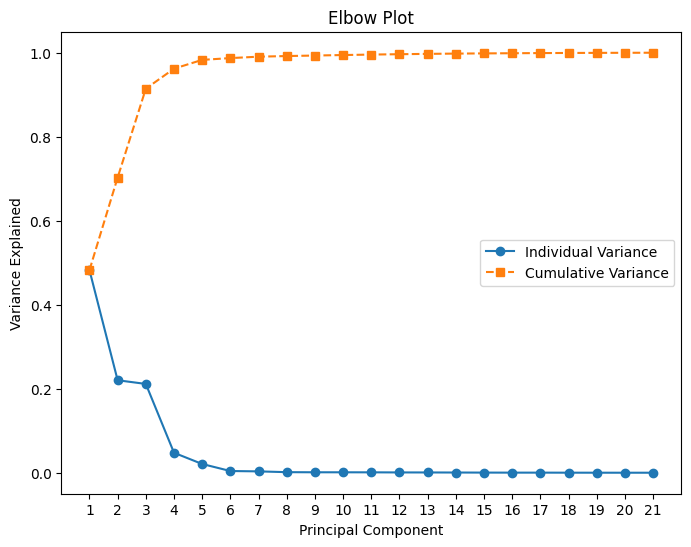

In [18]:
exp_var_rat = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance = np.cumsum(exp_var_rat)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(exp_var_rat) + 1), 
         exp_var_rat, marker='o', label='Individual Variance')
plt.plot(range(1, len(cumulative_variance) + 1), 
         cumulative_variance, marker='s', label='Cumulative Variance', linestyle='--')
plt.xticks(range(1, len(exp_var_rat) + 1))
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend();

cumulative_variance

**First 3 PC Explains Over 90% Variation, include those**

In [19]:
pc3 = PCA(n_components=3)
pc3.fit(xtrain)

PCA(n_components=3)

In [20]:
X3pc = pc3.fit_transform(xtrain)

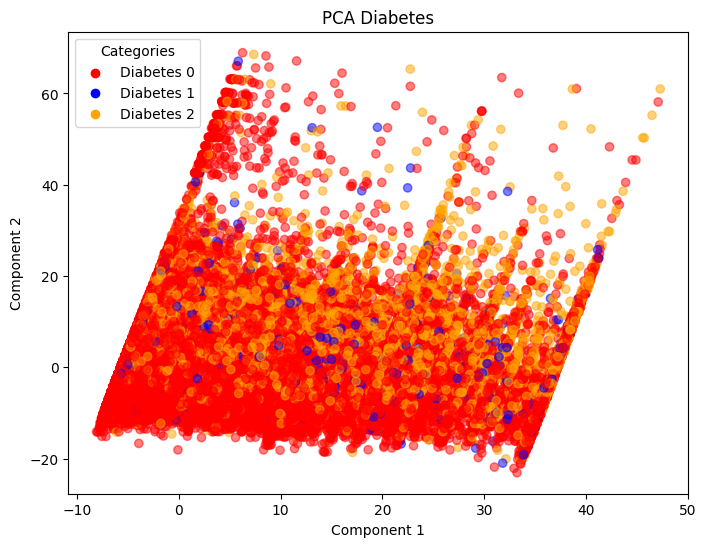

In [21]:
# Visualize first 2 PC

# Define color map
color_map = {0: 'red', 1: 'blue', 2: 'orange'}
colors = [color_map[label] for label in ytrain]

# plot
plt.figure(figsize=(8, 6))
plt.scatter(X3pc[:, 0], X3pc[:, 1], c=colors, alpha=0.5)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA Diabetes")

# legend
for label, color in color_map.items():
    plt.scatter([], [], c=color, label=f"Diabetes {label}")
plt.legend(title="Categories");

# Feature Selection

## VIF

In [22]:
# VIF test
numerical_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Diabetes_012'])
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)

# Dropping high VIF features (> 10)
high_vif_features = vif_data[vif_data['VIF'] > 10]['Feature'].tolist()
reduced_data = numerical_features.drop(columns=high_vif_features)

                 Feature        VIF
19             Education  29.535418
2              CholCheck  23.218631
11         AnyHealthcare  20.845109
3                    BMI  18.370922
20                Income  14.161942
13               GenHlth  10.829413
18                   Age   9.908186
9                Veggies   5.836165
7           PhysActivity   4.653018
8                 Fruits   3.035050
0                 HighBP   2.325504
1               HighChol   2.042535
15              PhysHlth   1.997009
4                 Smoker   1.934412
17                   Sex   1.912904
16              DiffWalk   1.842499
14              MentHlth   1.461370
21       Diabetes_binary   1.421765
6   HeartDiseaseorAttack   1.294423
12           NoDocbcCost   1.215924
5                 Stroke   1.127944
10     HvyAlcoholConsump   1.085088


## ANOVA

In [23]:
# ANOVA Test
anova_results = pd.DataFrame({
    'Feature': reduced_data.columns,
    'F-Statistic': [
        f_oneway(df[df['Diabetes_012'] == 0][feature],
                 df[df['Diabetes_012'] == 1][feature],
                 df[df['Diabetes_012'] == 2][feature]).statistic
        for feature in reduced_data.columns
    ],
    'P-Value': [
        f_oneway(df[df['Diabetes_012'] == 0][feature],
                 df[df['Diabetes_012'] == 1][feature],
                 df[df['Diabetes_012'] == 2][feature]).pvalue
        for feature in reduced_data.columns
    ]
})

# Sorting ANOVA results by P-Value
anova_results = anova_results.sort_values(by='P-Value', ascending=True)
print(anova_results)

                 Feature  F-Statistic        P-Value
0                 HighBP  8058.400809   0.000000e+00
1               HighChol  4565.886101   0.000000e+00
3                 Stroke  1212.235151   0.000000e+00
4   HeartDiseaseorAttack  3472.989877   0.000000e+00
5           PhysActivity  1536.378058   0.000000e+00
11              PhysHlth  3255.726142   0.000000e+00
12              DiffWalk  5510.495031   0.000000e+00
14                   Age  3627.792592   0.000000e+00
15       Diabetes_binary          inf   0.000000e+00
10              MentHlth   594.689340  3.044955e-258
2                 Smoker   422.479243  7.952539e-184
7                Veggies   367.504883  4.819366e-160
8      HvyAlcoholConsump   326.915581  1.780687e-142
9            NoDocbcCost   177.511695   9.440704e-78
6                 Fruits   172.230386   1.839508e-75
13                   Sex   103.963987   7.449528e-46


## Chi-Square

In [24]:
# Chi-Square Test
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.drop(columns=['Diabetes_012']))
target = df['Diabetes_012']
chi2_statistics, p_values = chi2(normalized_data, target)

chi2_results = pd.DataFrame({
    'Feature': df.columns.drop('Diabetes_012'),
    'Chi2 Statistic': chi2_statistics,
    'P-Value': p_values
})

chi2_results = chi2_results.sort_values(by='P-Value', ascending=True)
print(chi2_results)

                 Feature  Chi2 Statistic        P-Value
0                 HighBP     8537.517325   0.000000e+00
16              DiffWalk     8694.118380   0.000000e+00
15              PhysHlth     3764.468832   0.000000e+00
13               GenHlth     3509.763803   0.000000e+00
6   HeartDiseaseorAttack     6083.288510   0.000000e+00
21       Diabetes_binary   170908.000000   0.000000e+00
1               HighChol     5036.424963   0.000000e+00
5                 Stroke     2298.663875   0.000000e+00
18                   Age      773.726954  9.712402e-169
20                Income      739.881023  2.172087e-161
7           PhysActivity      735.309169  2.136204e-160
14              MentHlth      680.910022  1.387610e-148
10     HvyAlcoholConsump      615.127513  2.671515e-134
4                 Smoker      468.810127  1.581883e-102
12           NoDocbcCost      324.600410   3.265251e-71
3                    BMI      321.497081   1.540976e-70
19             Education      171.462200   5.854

## Final Features Selected

In [25]:
# Based on Correlation, VIF, ANOVA, and Chi-Square Test
significant_features = [
'HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack',
'PhysActivity', 'GenHlth', 'MentHlth',
'PhysHlth', 'DiffWalk', 'Age', 'Income'
]

print("Final Selected Features for Model Training:")
print(significant_features)
final_data = df[significant_features + ['Diabetes_012']]

Final Selected Features for Model Training:
['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']


In [26]:
#Up dating training and testing set
xtrain = xtrain[significant_features]
xtest = xtest[significant_features]

# Modeling

In [27]:
# Evaluation function 1 vs n ROC

def plot_multiclass_roc(y_pred_proba, y_true=ytest, classes=np.unique(ytest), title="1-vs-n ROC Curve"):
    """
    Plots a 1-vs-n ROC curve for multi-class classification.
    
    Parameters:
        y_true: True labels (test set).
        y_pred_proba: Predicted probabilities for each class.
        classes: Unique class labels.
        title: Title of the ROC curve plot.
    """
    from sklearn.metrics import roc_curve, auc, RocCurveDisplay, classification_report, confusion_matrix
    from sklearn.preprocessing import label_binarize
    from imblearn.metrics import classification_report_imbalanced
    from mlxtend.plotting import plot_confusion_matrix
    
    
    # Convert y_true to one-hot encoding for multi-class ROC
    y_test_bin = label_binarize(y_true, classes=classes)

    # Initialize a figure
    plt.figure(figsize=(10, 8))

    # Plot a ROC curve for each class (1-vs-n)
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        
        RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=f"Class {class_label}").plot(ax=plt.gca())

    # Add diagonal for random performance
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Performance")

    # Add plot details
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

## Over Sampling Minority Class

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

# original class distribution
print(f"Training set class distribution: {Counter(ytrain)}")

print(f"Testing set class distribution: {Counter(ytest)}")


# SMOTE
smote = SMOTE(random_state=42)
xtrain, ytrain = smote.fit_resample(xtrain, ytrain)

# Print the resampled class distribution
print(f"Resampled Training set class distribution: {Counter(ytrain)}")

Training set class distribution: Counter({0.0: 170908, 2.0: 28349, 1.0: 3687})
Testing set class distribution: Counter({0.0: 42795, 2.0: 6997, 1.0: 944})
Resampled Training set class distribution: Counter({0.0: 170908, 2.0: 170908, 1.0: 170908})


## Random Forest

Training set score: 0.7048
Test set score: 0.7876


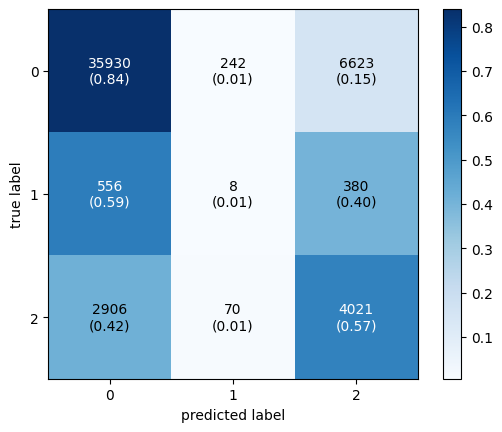

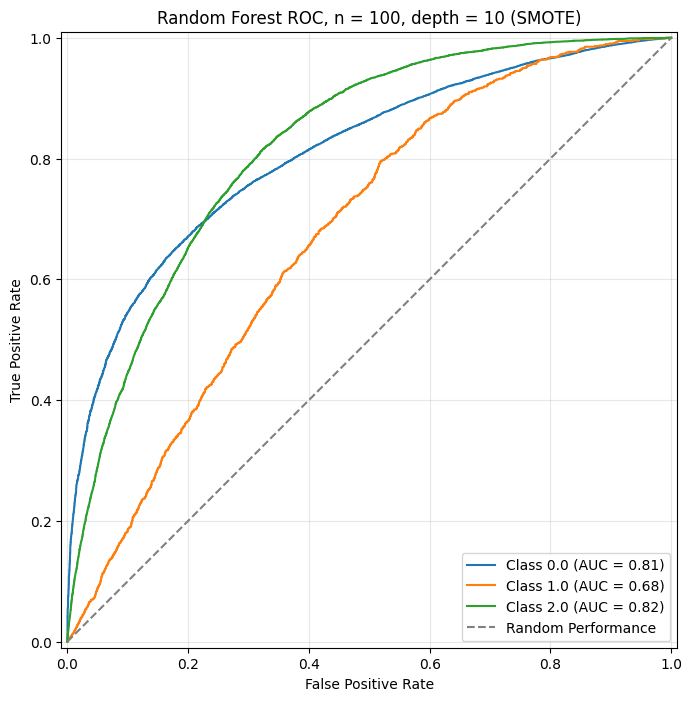

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on SMOTE train set
rf = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)

# Predict on original test set
y_pred = rf.predict(xtest)
y_pred_proba = rf.predict_proba(xtest)

# Evaluate the model
print('Training set score: {:.4f}'.format(rf.score(xtrain, ytrain)))
print('Test set score: {:.4f}'.format(rf.score(xtest, ytest)))

# Confusion matrix
cm_rf = confusion_matrix(ytest, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rf, show_absolute=True, show_normed=True, colorbar=True)

plot_multiclass_roc(y_pred_proba, title="Random Forest ROC, n = 100, depth = 10 (SMOTE)")

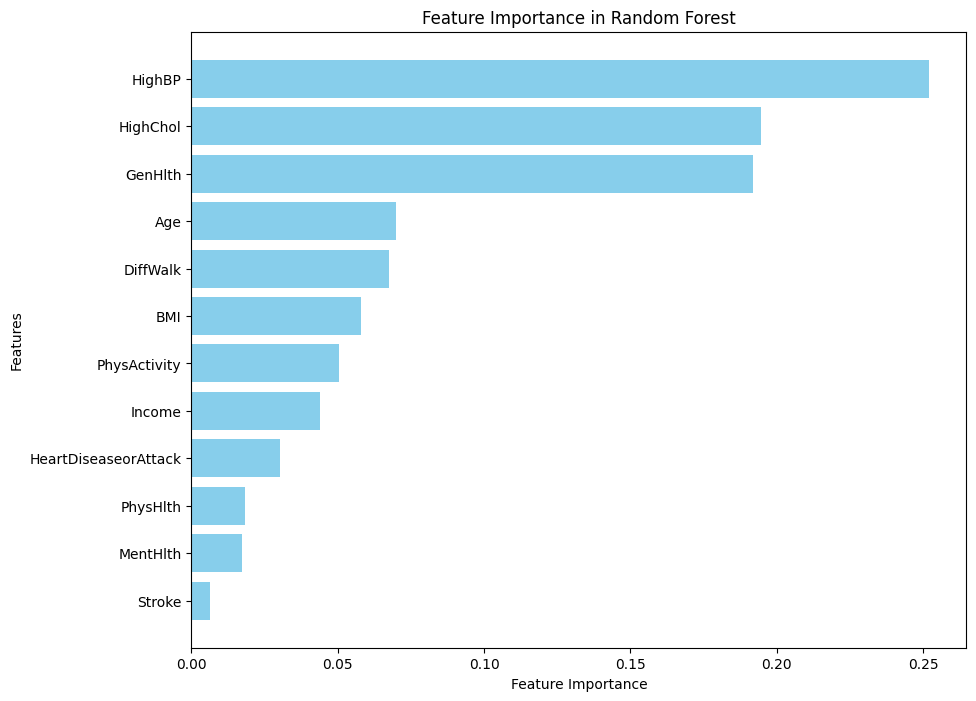

In [30]:
# Extract feature importances
importance_df = pd.DataFrame({
    "Feature": xtrain.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

## Naive Bayes

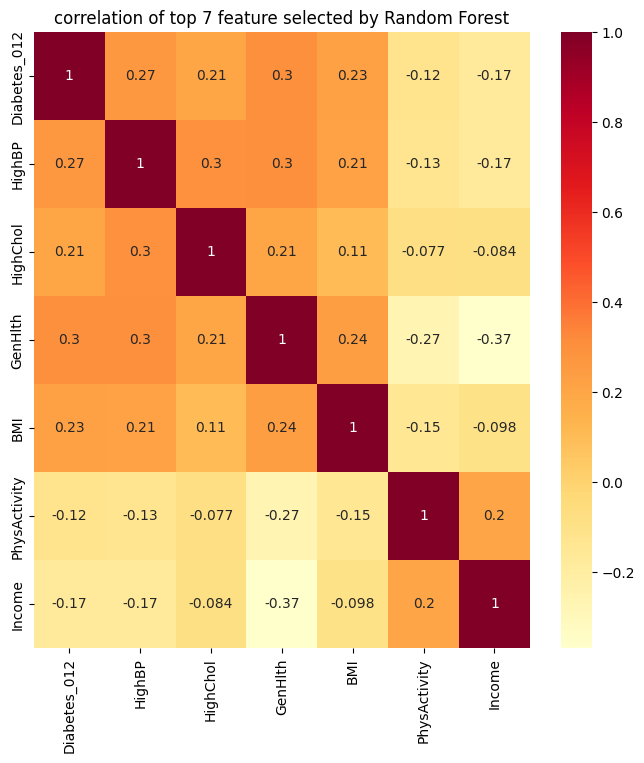

In [31]:
from sklearn.naive_bayes import GaussianNB

plt.figure(figsize = (8,8))
sns.heatmap(df[["Diabetes_012", "HighBP", "HighChol", "GenHlth", "BMI", "PhysActivity", "Income"]].corr(),
            annot=True , cmap ='YlOrRd')
plt.title("correlation of top 7 feature selected by Random Forest");

Train Accuracy: 0.51
Test Accuracy: 0.67


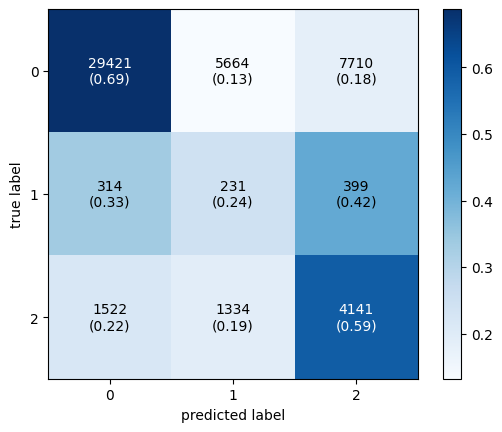

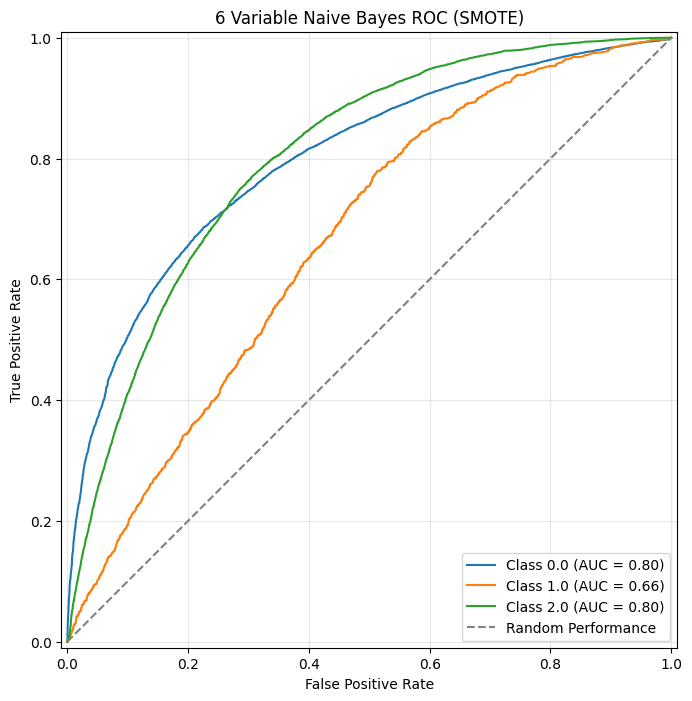

In [32]:
xtrain_nb = xtrain[["HighBP", "HighChol", "GenHlth", "BMI", "PhysActivity", "Income"]]
xtest_nb = xtest[["HighBP", "HighChol", "GenHlth", "BMI", "PhysActivity", "Income"]]

# Initialize gaussian nb
gnb = GaussianNB()

# Fit with training
gnb.fit(xtrain_nb, ytrain)

print(f"Train Accuracy: {accuracy_score(ytrain, gnb.predict(xtrain_nb)):.2f}")
print(f"Test Accuracy: {accuracy_score(ytest, gnb.predict(xtest_nb)):.2f}")

nb = confusion_matrix(ytest, gnb.predict(xtest_nb))

y_pred_proba = gnb.predict_proba(xtest_nb)

plot_confusion_matrix(conf_mat= nb,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plot_multiclass_roc(y_pred_proba, title="6 Variable Naive Bayes ROC (SMOTE)")

## Logistic Regression

Train Accuracy: 0.53
Test Accuracy: 0.65
0.6470356354462314


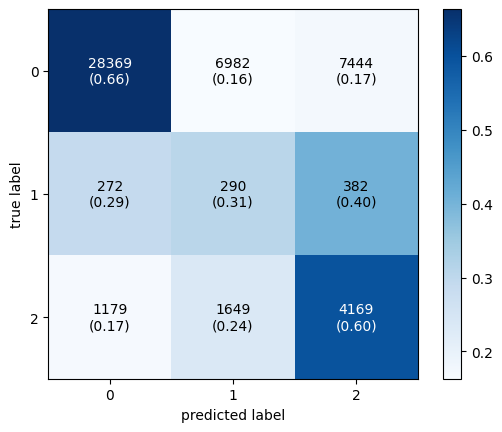

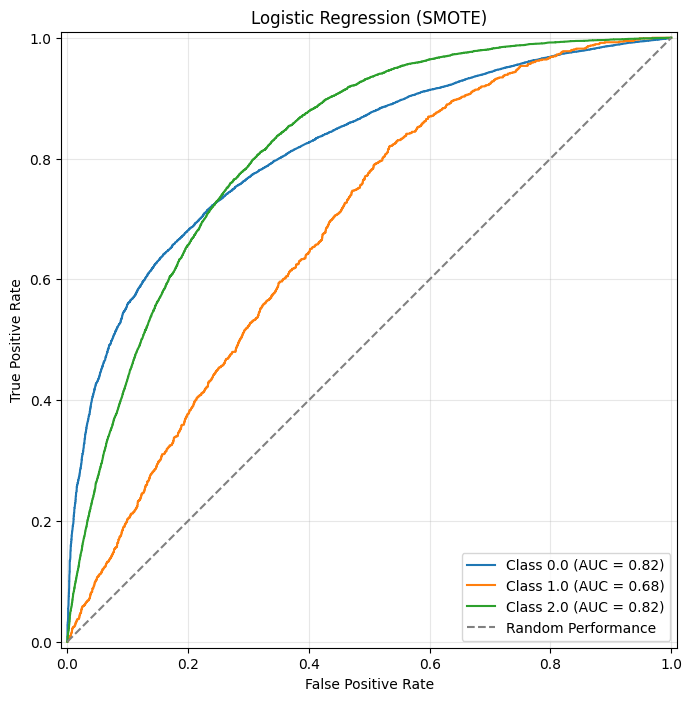

In [33]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter = 1500)
lg.fit(xtrain , ytrain)

y_pred=lg.predict(xtest)


print(f"Train Accuracy: {accuracy_score(ytrain, lg.predict(xtrain)):.2f}")
print(f"Test Accuracy: {accuracy_score(ytest, lg.predict(xtest)):.2f}")

matrix = accuracy_score(ytest,y_pred )
print(matrix)

# confusion matrix
cm1 = confusion_matrix(ytest,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)


y_pred_proba = lg.predict_proba(xtest)
plot_multiclass_roc(y_pred_proba, title="Logistic Regression (SMOTE)")